# TASK 1

Sample data set: https://data.worldbank.org/indicator/SP.POP.TOTL

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings



In [5]:
warnings.filterwarnings("ignore")

In [6]:
skiprows_w = 4  #Skip the first 4 rows that are not part of the data frame
skiprows_m = 4  
skiprows_t = 4  

# Import data
df_w = pd.read_csv('C:/Users/Mariana/Documents/Documents/Data Science/Prodigy/Task1/API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_3783.csv', skiprows=skiprows_w)
df_m = pd.read_csv('C:/Users/Mariana/Documents/Documents/Data Science/Prodigy/Task1/API_SP.POP.TOTL.MA.IN_DS2_en_csv_v2_3785.csv', skiprows=skiprows_m)
df_t = pd.read_csv('C:/Users/Mariana/Documents/Documents/Data Science/Prodigy/Task1/API_SP.POP.TOTL_DS2_en_csv_v2_85.csv', skiprows=skiprows_t)


# Concatenate the three csv
df_result = pd.concat([df_t, df_w, df_m], ignore_index=True)
df_result.to_csv('total_population.csv', index=False)

In [7]:
df = pd.read_csv('total_population.csv')

### EDA

In [8]:
# Check out the head of the dataframe
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [9]:
# Check out the tail of the dataframe
df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
793,Kosovo,XKX,"Population, male",SP.POP.TOTL.MA.IN,480530.0,490286.0,504594.0,518893.0,533197.0,547497.0,...,904599.0,892179.0,886760.0,893367.0,896319.0,892156.0,892592.0,890237.0,878107.0,NaN
794,"Yemen, Rep.",YEM,"Population, male",SP.POP.TOTL.MA.IN,2766233.0,2815795.0,2865985.0,2915350.0,2968527.0,3027525.0,...,14052916.0,14439156.0,14820156.0,15202496.0,15578957.0,15953578.0,16320979.0,16668432.0,17023203.0,NaN
795,South Africa,ZAF,"Population, male",SP.POP.TOTL.MA.IN,8502461.0,8725719.0,8971110.0,9228327.0,9496079.0,9774939.0,...,26500685.0,27155417.0,27418165.0,27465269.0,27822349.0,28207948.0,28580784.0,28894608.0,29168006.0,NaN
796,Zambia,ZMB,"Population, male",SP.POP.TOTL.MA.IN,1544463.0,1593349.0,1644170.0,1696940.0,1751316.0,1807590.0,...,7744381.0,8000338.0,8260471.0,8525934.0,8794716.0,9066397.0,9338613.0,9609004.0,9877642.0,NaN
797,Zimbabwe,ZWE,"Population, male",SP.POP.TOTL.MA.IN,1883976.0,1942236.0,2002581.0,2065073.0,2129644.0,2196331.0,...,6508226.0,6652836.0,6796658.0,6940631.0,7086002.0,7231989.0,7385220.0,7543690.0,7705601.0,NaN


In [10]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [11]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object

In [12]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,7.920000e+02,...,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,0.0
mean,7.818078e+07,7.925381e+07,8.070073e+07,8.248885e+07,8.429189e+07,8.612087e+07,8.802695e+07,8.993201e+07,9.189056e+07,9.391924e+07,...,1.977569e+08,2.003210e+08,2.028842e+08,2.054513e+08,2.079760e+08,2.104467e+08,2.128397e+08,2.150147e+08,2.169822e+08,NaN
std,2.624466e+08,2.656789e+08,2.704496e+08,2.766246e+08,2.828298e+08,2.891281e+08,2.957551e+08,3.023518e+08,3.091524e+08,3.162305e+08,...,6.605209e+08,6.685103e+08,6.764513e+08,6.843984e+08,6.921360e+08,6.996383e+08,7.068075e+08,7.132806e+08,7.189283e+08,NaN
min,1.258000e+03,1.389000e+03,1.540000e+03,1.702000e+03,1.873000e+03,2.054000e+03,2.245000e+03,2.394000e+03,2.486000e+03,2.604000e+03,...,5.272000e+03,5.261000e+03,5.244000e+03,5.230000e+03,5.252000e+03,5.301000e+03,5.367000e+03,5.449000e+03,5.513000e+03,NaN
25%,2.899265e+05,2.946302e+05,3.027848e+05,3.091045e+05,3.154115e+05,3.205018e+05,3.311480e+05,3.359760e+05,3.428380e+05,3.487190e+05,...,1.026230e+06,1.034846e+06,1.036245e+06,1.039796e+06,1.039883e+06,1.044193e+06,1.051210e+06,1.054039e+06,1.063685e+06,NaN
50%,2.310580e+06,2.375753e+06,2.436613e+06,2.489193e+06,2.546302e+06,2.593324e+06,2.647886e+06,2.734174e+06,2.804783e+06,2.885900e+06,...,5.835500e+06,5.956900e+06,6.079500e+06,6.198200e+06,6.276342e+06,6.349991e+06,6.475368e+06,6.582239e+06,6.664449e+06,NaN
75%,1.567119e+07,1.589735e+07,1.623738e+07,1.669124e+07,1.715933e+07,1.764764e+07,1.815916e+07,1.867877e+07,1.919349e+07,1.968963e+07,...,3.875061e+07,3.960138e+07,4.048834e+07,4.142583e+07,4.200276e+07,4.286056e+07,4.379186e+07,4.400044e+07,4.460536e+07,NaN
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    798 non-null    object 
 1   Country Code    798 non-null    object 
 2   Indicator Name  798 non-null    object 
 3   Indicator Code  798 non-null    object 
 4   1960            792 non-null    float64
 5   1961            792 non-null    float64
 6   1962            792 non-null    float64
 7   1963            792 non-null    float64
 8   1964            792 non-null    float64
 9   1965            792 non-null    float64
 10  1966            792 non-null    float64
 11  1967            792 non-null    float64
 12  1968            792 non-null    float64
 13  1969            792 non-null    float64
 14  1970            792 non-null    float64
 15  1971            792 non-null    float64
 16  1972            792 non-null    float64
 17  1973            792 non-null    flo

In [14]:
#Check null values
df.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                6
                 ... 
2019                3
2020                3
2021                3
2022                3
Unnamed: 67       798
Length: 68, dtype: int64

In [16]:
#Drop the column that doesn't have any values
df = df.drop(columns='Unnamed: 67', errors='ignore')

In [17]:
df.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Drop the rows that have null values
df = df.dropna()
df.to_csv('total_population.csv', index=False)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 797
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    792 non-null    object 
 1   Country Code    792 non-null    object 
 2   Indicator Name  792 non-null    object 
 3   Indicator Code  792 non-null    object 
 4   1960            792 non-null    float64
 5   1961            792 non-null    float64
 6   1962            792 non-null    float64
 7   1963            792 non-null    float64
 8   1964            792 non-null    float64
 9   1965            792 non-null    float64
 10  1966            792 non-null    float64
 11  1967            792 non-null    float64
 12  1968            792 non-null    float64
 13  1969            792 non-null    float64
 14  1970            792 non-null    float64
 15  1971            792 non-null    float64
 16  1972            792 non-null    float64
 17  1973            792 non-null    float64


In [20]:
 #Remove rows that don't correspond to a country
nombres = ['World', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)', 'North America', 'Euro area' ,'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only', 'Early-demographic dividend', 'Lower middle income', 'Upper middle income', 'East Asia & Pacific', 'Late-demographic dividend', 'East Asia & Pacific (excluding high income)', 'East Asia & Pacific (IDA & IBRD countries)', 'South Asia', 'South Asia (IDA & IBRD)', 'IDA total', 'OECD members', 'High income', 'IDA only', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Least developed countries: UN classification', 'Post-demographic dividend', 'Pre-demographic dividend', 'Fragile and conflict affected situations', 'Europe & Central Asia', 'Heavily indebted poor countries (HIPC)', 'Africa Eastern and Southern', 'Low income', 'Latin America & Caribbean', 'Latin America & the Caribbean (IDA & IBRD coun...', 'IDA blend', 'Latin America & Caribbean (excluding high income)', 'Middle East & North Africa', 'Africa Western and Central', 'Arab World', 'Europe & Central Asia (IDA & IBRD countries)', 'European Union', 'Middle East & North Africa (excluding high inc...', 'Middle East & North Africa (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)']
df = df[~df['Country Name'].isin(nombres)]
df.to_csv('total_population.csv', index=False)

### Data Visualization

In [21]:
#Data that corresponds to the total poupulation
tot_pop = df[df['Indicator Code'] == 'SP.POP.TOTL']
tot_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
5,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2777689.0
6,Andorra,AND,"Population, total",SP.POP.TOTL,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,...,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [22]:
#Countries with the largest population in 2022
tot_pop_sort = tot_pop.sort_values(by = '2022', ascending = False)
top_10 = tot_pop_sort.head(10)
top_10

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
109,India,IND,"Population, total",SP.POP.TOTL,445954579.0,456351876.0,467024193.0,477933619.0,489059309.0,500114346.0,...,1.291132e+09,1.307247e+09,1.322867e+09,1.338636e+09,1.354196e+09,1.369003e+09,1.383112e+09,1.396387e+09,1.407564e+09,1.417173e+09
40,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,1.412175e+09
251,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,3.160599e+08,3.183863e+08,3.207390e+08,3.230718e+08,3.251221e+08,3.268382e+08,3.283300e+08,3.315115e+08,3.320316e+08,3.332876e+08
106,Indonesia,IDN,"Population, total",SP.POP.TOTL,88382881.0,90816938.0,93345489.0,95962527.0,98675061.0,101157868.0,...,2.532759e+08,2.562298e+08,2.590920e+08,2.618502e+08,2.644989e+08,2.670668e+08,2.695829e+08,2.718580e+08,2.737532e+08,2.755013e+08
184,Pakistan,PAK,"Population, total",SP.POP.TOTL,45954226.0,47060915.0,48161841.0,49325050.0,50552592.0,51841626.0,...,2.053376e+08,2.082516e+08,2.109693e+08,2.135248e+08,2.163797e+08,2.197315e+08,2.232933e+08,2.271967e+08,2.314021e+08,2.358249e+08
174,Nigeria,NGA,"Population, total",SP.POP.TOTL,44928342.0,45855507.0,46821845.0,47822569.0,48856332.0,49925799.0,...,1.747261e+08,1.793790e+08,1.839958e+08,1.886669e+08,1.934959e+08,1.983876e+08,2.033045e+08,2.083274e+08,2.134013e+08,2.185412e+08
29,Brazil,BRA,"Population, total",SP.POP.TOTL,73092515.0,75330008.0,77599218.0,79915555.0,82262794.0,84623747.0,...,2.017218e+08,2.034596e+08,2.051882e+08,2.068596e+08,2.085050e+08,2.101666e+08,2.117829e+08,2.131963e+08,2.143262e+08,2.153135e+08
20,Bangladesh,BGD,"Population, total",SP.POP.TOTL,50396429.0,51882769.0,53461661.0,55094115.0,56774465.0,58500159.0,...,1.540301e+08,1.559613e+08,1.578300e+08,1.597846e+08,1.617940e+08,1.636840e+08,1.655162e+08,1.674210e+08,1.693563e+08,1.711864e+08
202,Russian Federation,RUS,"Population, total",SP.POP.TOTL,119897000.0,121236000.0,122591000.0,123960000.0,125345000.0,126745000.0,...,1.435070e+08,1.438197e+08,1.440969e+08,1.443424e+08,1.444967e+08,1.444779e+08,1.444063e+08,1.440731e+08,1.441305e+08,1.442369e+08
154,Mexico,MEX,"Population, total",SP.POP.TOTL,36268055.0,37439317.0,38683283.0,39982118.0,41333878.0,42737991.0,...,1.172907e+08,1.187559e+08,1.201499e+08,1.215192e+08,1.228393e+08,1.240139e+08,1.250853e+08,1.259983e+08,1.267051e+08,1.275041e+08


Text(0, 0.5, 'Country')

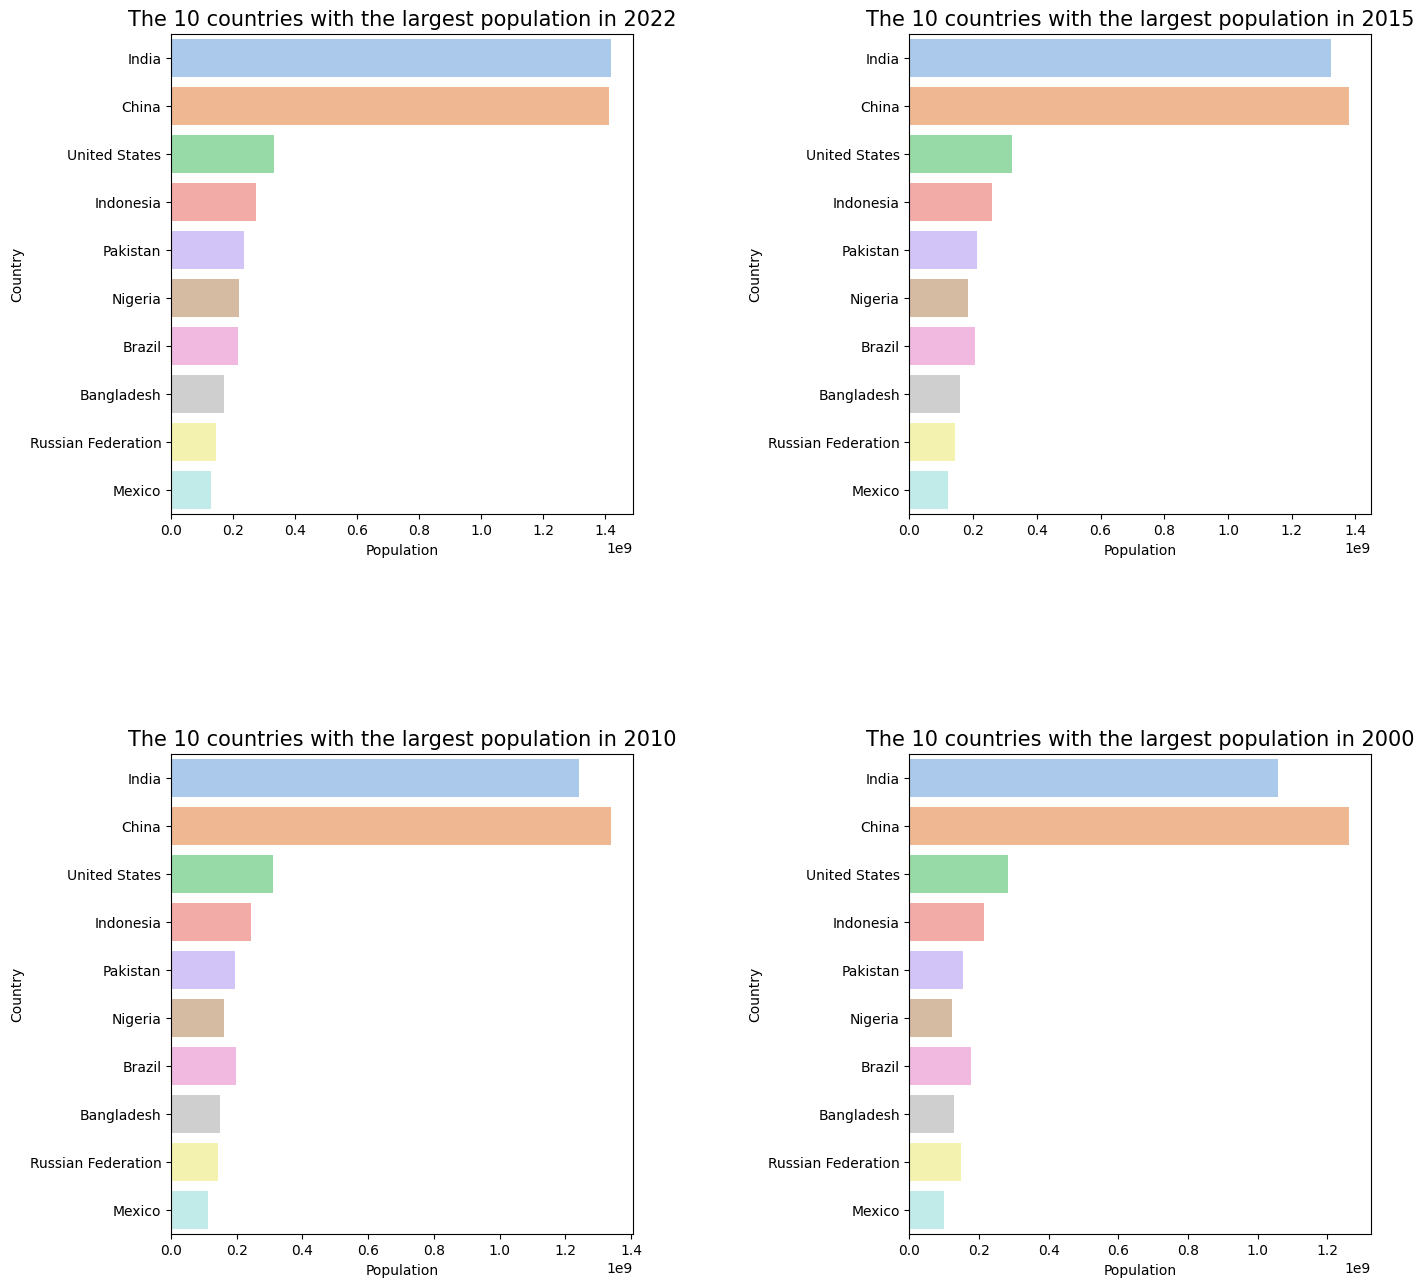

In [23]:
#Bar plots
plt.figure(figsize = (15, 15))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.6, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data = top_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest population in 2015', size = 15)
sns.barplot(x = '2015', y = 'Country Name', data = top_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest population in 2010', size = 15)
sns.barplot(x = '2010', y = 'Country Name', data = top_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = top_10, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [24]:
#Data that corresponds to the total male poupulation
tot_pop_male = df[df['Indicator Code'] == 'SP.POP.TOTL.MA.IN']

tot_pop_sort_male = tot_pop_male.sort_values(by = '2022', ascending = False)
top_10_male = tot_pop_sort_male.head(10)
top_10_male

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
641,India,IND,"Population, male",SP.POP.TOTL.MA.IN,230135579.0,235560577.0,241125862.0,246813291.0,252612930.0,258373487.0,...,667322883.0,675549357.0,683543213.0,691623419.0,699587889.0,707149230.0,714325057.0,720997448.0,726503429.0,731180498.0
572,China,CHN,"Population, male",SP.POP.TOTL.MA.IN,341138996.0,337450093.0,340026760.0,348325853.0,356360258.0,364804644.0,...,697792609.0,702159650.0,706169297.0,710100087.0,714208198.0,717291023.0,719565010.0,720928153.0,721140373.0,720646499.0
783,United States,USA,"Population, male",SP.POP.TOTL.MA.IN,89542830.0,90943338.0,92244198.0,93477522.0,94683009.0,95722859.0,...,156025758.0,157301571.0,158580581.0,159847727.0,160970309.0,161911851.0,162730147.0,164308503.0,164481553.0,165021339.0
638,Indonesia,IDN,"Population, male",SP.POP.TOTL.MA.IN,44084045.0,45311709.0,46589573.0,47913104.0,49281528.0,50487080.0,...,127582414.0,129071050.0,130517327.0,131909809.0,133245399.0,134536680.0,135798442.0,136927582.0,137852478.0,138703277.0
716,Pakistan,PAK,"Population, male",SP.POP.TOTL.MA.IN,24795178.0,25363721.0,25930189.0,26526519.0,27153709.0,27810773.0,...,105378643.0,106815000.0,107983708.0,108894512.0,110003086.0,111438323.0,113015042.0,114815641.0,116815852.0,118960880.0
706,Nigeria,NGA,"Population, male",SP.POP.TOTL.MA.IN,22418787.0,22883240.0,23367743.0,23870161.0,24388349.0,24924766.0,...,88080932.0,90449577.0,92803434.0,95191980.0,97662955.0,100165119.0,102680839.0,105243174.0,107827012.0,110448136.0
561,Brazil,BRA,"Population, male",SP.POP.TOTL.MA.IN,36658093.0,37763189.0,38880853.0,40022356.0,41178982.0,42341802.0,...,99355387.0,100185186.0,101008689.0,101794390.0,102567011.0,103354449.0,104119798.0,104779288.0,105291292.0,105733027.0
552,Bangladesh,BGD,"Population, male",SP.POP.TOTL.MA.IN,26157018.0,26915881.0,27723366.0,28562367.0,29428178.0,30318485.0,...,76786999.0,77673568.0,78535803.0,79459393.0,80422431.0,81314565.0,82164179.0,83063714.0,83998088.0,84859213.0
734,Russian Federation,RUS,"Population, male",SP.POP.TOTL.MA.IN,53715149.0,54464628.0,55213503.0,55965087.0,56712371.0,57451440.0,...,66481170.0,66665787.0,66823446.0,66964302.0,67064796.0,67084512.0,67076532.0,66925854.0,66941089.0,66987198.0
686,Mexico,MEX,"Population, male",SP.POP.TOTL.MA.IN,18239142.0,18822518.0,19442648.0,20090731.0,20765815.0,21467510.0,...,57427865.0,58145362.0,58824776.0,59489629.0,60126616.0,60685164.0,61187228.0,61587451.0,61856137.0,62194954.0


Text(0, 0.5, 'Country')

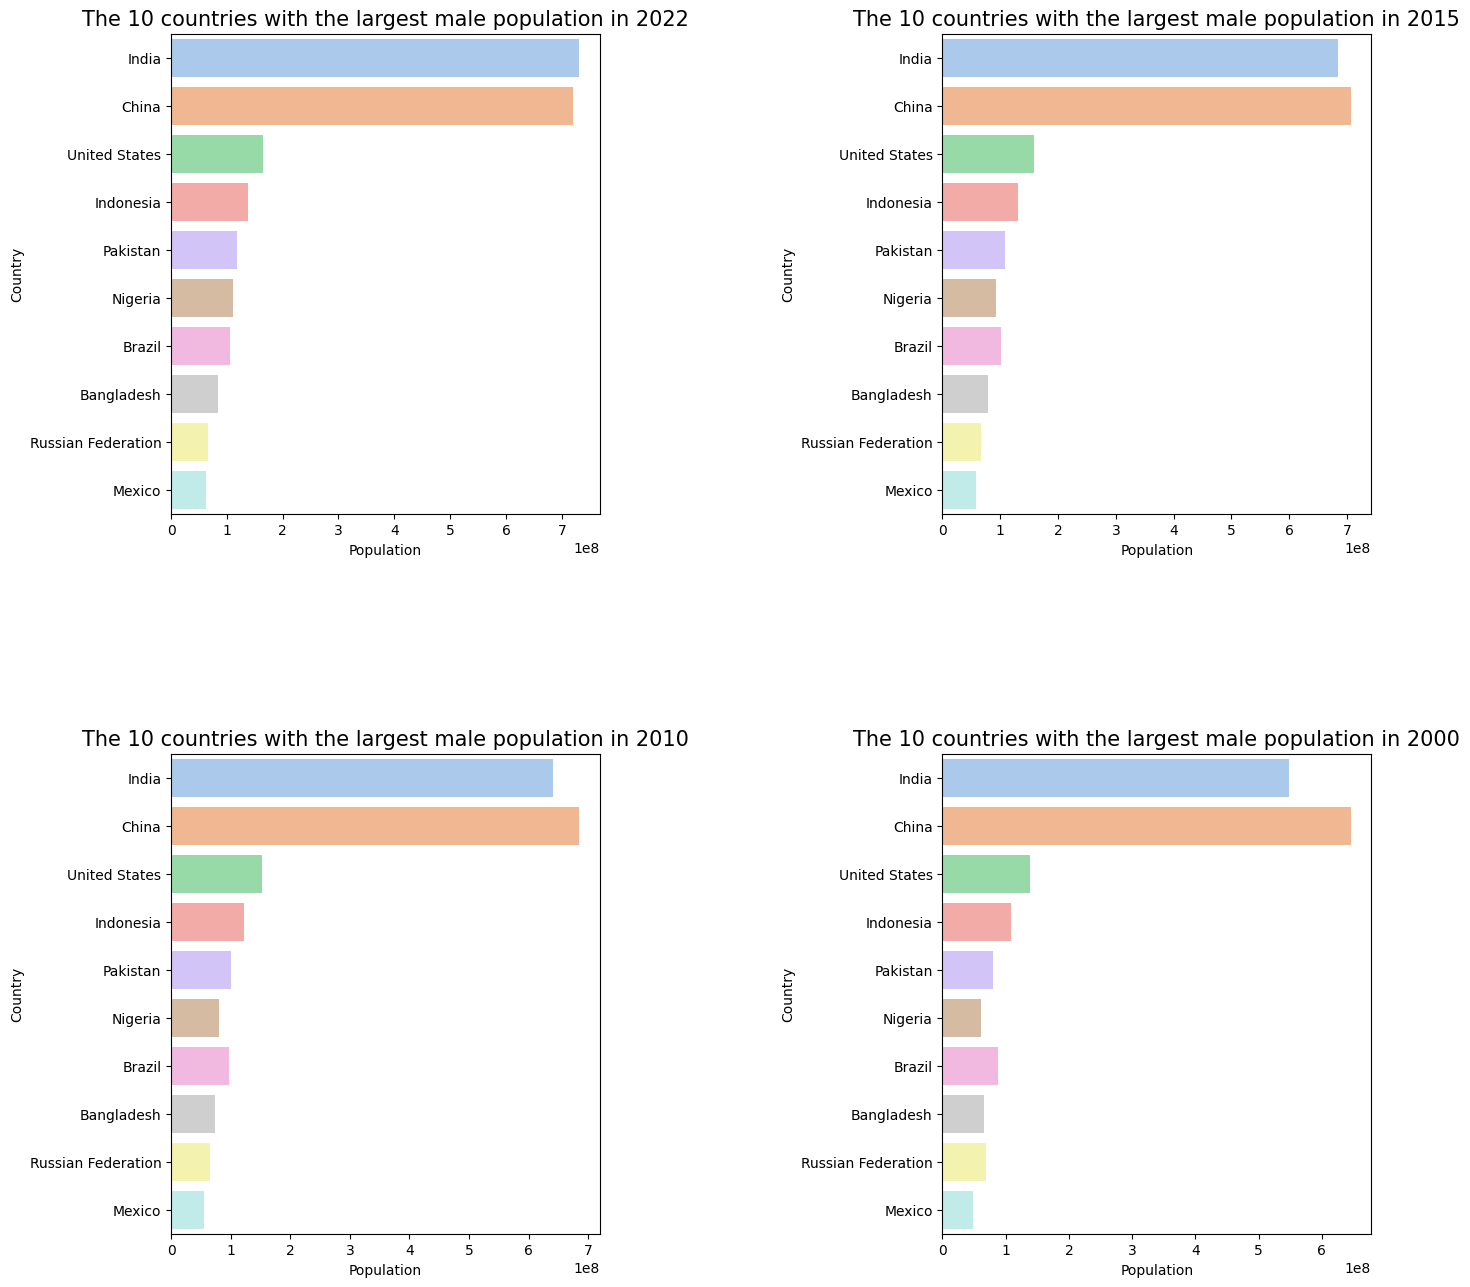

In [25]:
#Bar plots 
plt.figure(figsize = (15, 15))

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 0.8, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest male population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data = top_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest male population in 2015', size = 15)
sns.barplot(x = '2015', y = 'Country Name', data = top_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest male population in 2010', size = 15)
sns.barplot(x = '2010', y = 'Country Name', data = top_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest male population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = top_10_male, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [26]:
#Data that corresponds to the total female poupulation
tot_pop_female = df[df['Indicator Code'] == 'SP.POP.TOTL.FE.IN']

tot_pop_sort_female = tot_pop_female.sort_values(by = '2022', ascending = False)
top_10_female = tot_pop_sort_female.head(10)
top_10_female

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
306,China,CHN,"Population, female",SP.POP.TOTL.FE.IN,325931004.0,322879907.0,325743240.0,334009147.0,341994742.0,350380356.0,...,665447390.0,669700351.0,673690703.0,677689913.0,682006802.0,685468978.0,688179990.0,690171848.0,691219627.0,691528501.0
375,India,IND,"Population, female",SP.POP.TOTL.FE.IN,215819000.0,220791299.0,225898332.0,231120329.0,236446379.0,241740859.0,...,623809180.0,631697152.0,639323292.0,647012921.0,654607791.0,661854076.0,668786993.0,675389679.0,681060412.0,685992675.0
517,United States,USA,"Population, female",SP.POP.TOTL.FE.IN,91128169.0,92747662.0,94293802.0,95764478.0,97205992.0,98580141.0,...,160034189.0,161084758.0,162158414.0,163224028.0,164151818.0,164926348.0,165599805.0,167203010.0,167550001.0,168266219.0
372,Indonesia,IDN,"Population, female",SP.POP.TOTL.FE.IN,44298836.0,45505228.0,46755916.0,48049423.0,49393533.0,50670788.0,...,125693504.0,127158711.0,128574643.0,129940374.0,131253454.0,132530163.0,133784436.0,134930389.0,135900714.0,136798063.0
450,Pakistan,PAK,"Population, female",SP.POP.TOTL.FE.IN,21159049.0,21697194.0,22231652.0,22798530.0,23398883.0,24030852.0,...,99958919.0,101436628.0,102985590.0,104630327.0,106376569.0,108293156.0,110278237.0,112381099.0,114586264.0,116863982.0
295,Brazil,BRA,"Population, female",SP.POP.TOTL.FE.IN,36434422.0,37566819.0,38718365.0,39893199.0,41083812.0,42281945.0,...,102366379.0,103274465.0,104179515.0,105065188.0,105937948.0,106812144.0,107663080.0,108417015.0,109034931.0,109580471.0
440,Nigeria,NGA,"Population, female",SP.POP.TOTL.FE.IN,22509554.0,22972267.0,23454102.0,23952407.0,24467983.0,25001034.0,...,86645192.0,88929439.0,91192351.0,93474951.0,95832952.0,98222504.0,100623652.0,103084231.0,105574310.0,108093075.0
286,Bangladesh,BGD,"Population, female",SP.POP.TOTL.FE.IN,24239411.0,24966888.0,25738295.0,26531749.0,27346287.0,28181674.0,...,77243140.0,78287731.0,79294197.0,80325176.0,81371533.0,82369393.0,83352043.0,84357236.0,85358163.0,86327159.0
468,Russian Federation,RUS,"Population, female",SP.POP.TOTL.FE.IN,66181851.0,66771372.0,67377496.0,67994913.0,68632629.0,69293561.0,...,77025825.0,77153880.0,77273424.0,77378095.0,77431943.0,77393346.0,77329730.0,77147284.0,77189393.0,77249735.0
420,Mexico,MEX,"Population, female",SP.POP.TOTL.FE.IN,18028913.0,18616799.0,19240634.0,19891387.0,20568063.0,21270482.0,...,59862821.0,60610526.0,61325120.0,62029592.0,62712641.0,63328698.0,63898082.0,64410851.0,64849001.0,65309171.0


Text(0, 0.5, 'Country')

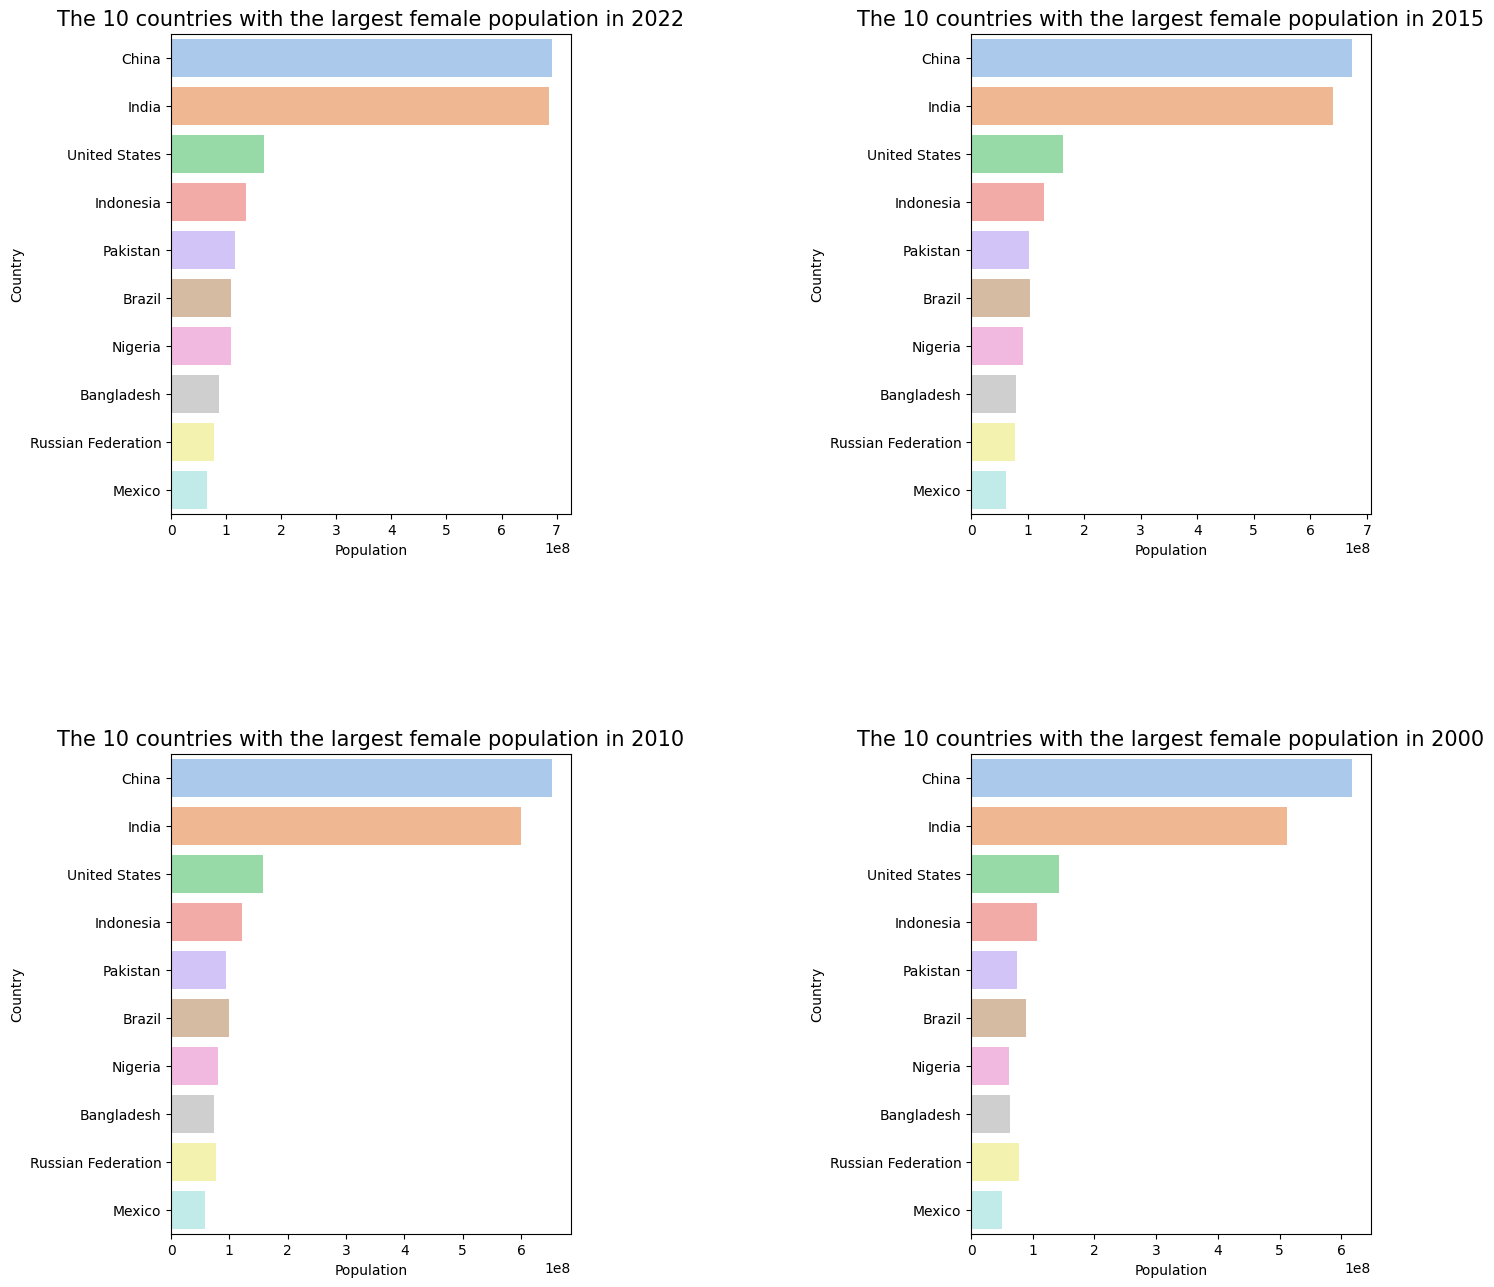

In [27]:
#Bar plots
plt.figure(figsize = (15, 15))

plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top =0.9, wspace = 1, hspace = 0.5)

plt.subplot(2, 2, 1)
plt.title('The 10 countries with the largest female population in 2022', size = 15)
sns.barplot(x = '2022', y = 'Country Name', data = top_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 2)
plt.title('The 10 countries with the largest female population in 2015', size = 15)
sns.barplot(x = '2015', y = 'Country Name', data = top_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

plt.subplot(2, 2, 3)
plt.title('The 10 countries with the largest female population in 2010', size = 15)
sns.barplot(x = '2010', y = 'Country Name', data = top_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')


plt.subplot(2, 2, 4)
plt.title('The 10 countries with the largest female population in 2000', size = 15)
sns.barplot(x = '2000', y = 'Country Name', data = top_10_female, palette= 'pastel')
plt.xlabel('Population')
plt.ylabel('Country')

In [28]:
#Combine female and male population in the same row and get the total population of 2000, 2008, 2012, 2018 and 2022
combined_df = pd.merge(tot_pop_male, tot_pop_female, on = 'Country Name', suffixes=('_male', '_female'))

combined_df['Total Population 2000'] = combined_df['2000_male'] + combined_df['2000_female']
combined_df['Total Population 2008'] = combined_df['2008_male'] + combined_df['2008_female']
combined_df['Total Population 2012'] = combined_df['2012_male'] + combined_df['2012_female']
combined_df['Total Population 2018'] = combined_df['2018_male'] + combined_df['2018_female']
combined_df['Total Population 2022'] = combined_df['2022_male'] + combined_df['2022_female']


df_total_2022= combined_df.sort_values(by = 'Total Population 2022', ascending= False)
df_total_2022 = df_total_2022.head(10)
df_total_2022

,Country Name,Country Code_male,Indicator Name_male,Indicator Code_male,1960_male,1961_male,1962_male,1963_male,1964_male,1965_male,...,2018_female,2019_female,2020_female,2021_female,2022_female,Total Population 2000,Total Population 2008,Total Population 2012,Total Population 2018,Total Population 2022
91,India,IND,"Population, male",SP.POP.TOTL.MA.IN,230135579.0,235560577.0,241125862.0,246813291.0,252612930.0,258373487.0,...,661854076.0,668786993.0,675389679.0,681060412.0,685992675.0,1.059634e+09,1.206735e+09,1.274487e+09,1.369003e+09,1.417173e+09
37,China,CHN,"Population, male",SP.POP.TOTL.MA.IN,341138996.0,337450093.0,340026760.0,348325853.0,356360258.0,364804644.0,...,685468978.0,688179990.0,690171848.0,691219627.0,691528501.0,1.262645e+09,1.324655e+09,1.354190e+09,1.402760e+09,1.412175e+09
207,United States,USA,"Population, male",SP.POP.TOTL.MA.IN,89542830.0,90943338.0,92244198.0,93477522.0,94683009.0,95722859.0,...,164926348.0,165599805.0,167203010.0,167550001.0,168266219.0,2.821624e+08,3.040940e+08,3.138777e+08,3.268382e+08,3.332876e+08
89,Indonesia,IDN,"Population, male",SP.POP.TOTL.MA.IN,44084045.0,45311709.0,46589573.0,47913104.0,49281528.0,50487080.0,...,132530163.0,133784436.0,134930389.0,135900714.0,136798063.0,2.140724e+08,2.379365e+08,2.502227e+08,2.670668e+08,2.755013e+08
153,Pakistan,PAK,"Population, male",SP.POP.TOTL.MA.IN,24795178.0,25363721.0,25930189.0,26526519.0,27153709.0,27810773.0,...,108293156.0,110278237.0,112381099.0,114586264.0,116863982.0,1.543699e+08,1.859320e+08,2.022059e+08,2.197315e+08,2.358249e+08
144,Nigeria,NGA,"Population, male",SP.POP.TOTL.MA.IN,22418787.0,22883240.0,23367743.0,23870161.0,24388349.0,24924766.0,...,98222504.0,100623652.0,103084231.0,105574310.0,108093075.0,1.228520e+08,1.523825e+08,1.700759e+08,1.983876e+08,2.185412e+08
26,Brazil,BRA,"Population, male",SP.POP.TOTL.MA.IN,36658093.0,37763189.0,38880853.0,40022356.0,41178982.0,42341802.0,...,106812144.0,107663080.0,108417015.0,109034931.0,109580471.0,1.758737e+08,1.926723e+08,1.999777e+08,2.101666e+08,2.153135e+08
17,Bangladesh,BGD,"Population, male",SP.POP.TOTL.MA.IN,26157018.0,26915881.0,27723366.0,28562367.0,29428178.0,30318485.0,...,82369393.0,83352043.0,84357236.0,85358163.0,86327159.0,1.291933e+08,1.454213e+08,1.520906e+08,1.636840e+08,1.711864e+08
168,Russian Federation,RUS,"Population, male",SP.POP.TOTL.MA.IN,53715149.0,54464628.0,55213503.0,55965087.0,56712371.0,57451440.0,...,77393346.0,77329730.0,77147284.0,77189393.0,77249735.0,1.465969e+08,1.427424e+08,1.432017e+08,1.444779e+08,1.442369e+08
127,Mexico,MEX,"Population, male",SP.POP.TOTL.MA.IN,18239142.0,18822518.0,19442648.0,20090731.0,20765815.0,21467510.0,...,63328698.0,63898082.0,64410851.0,64849001.0,65309171.0,9.787344e+07,1.096845e+08,1.157559e+08,1.240139e+08,1.275041e+08


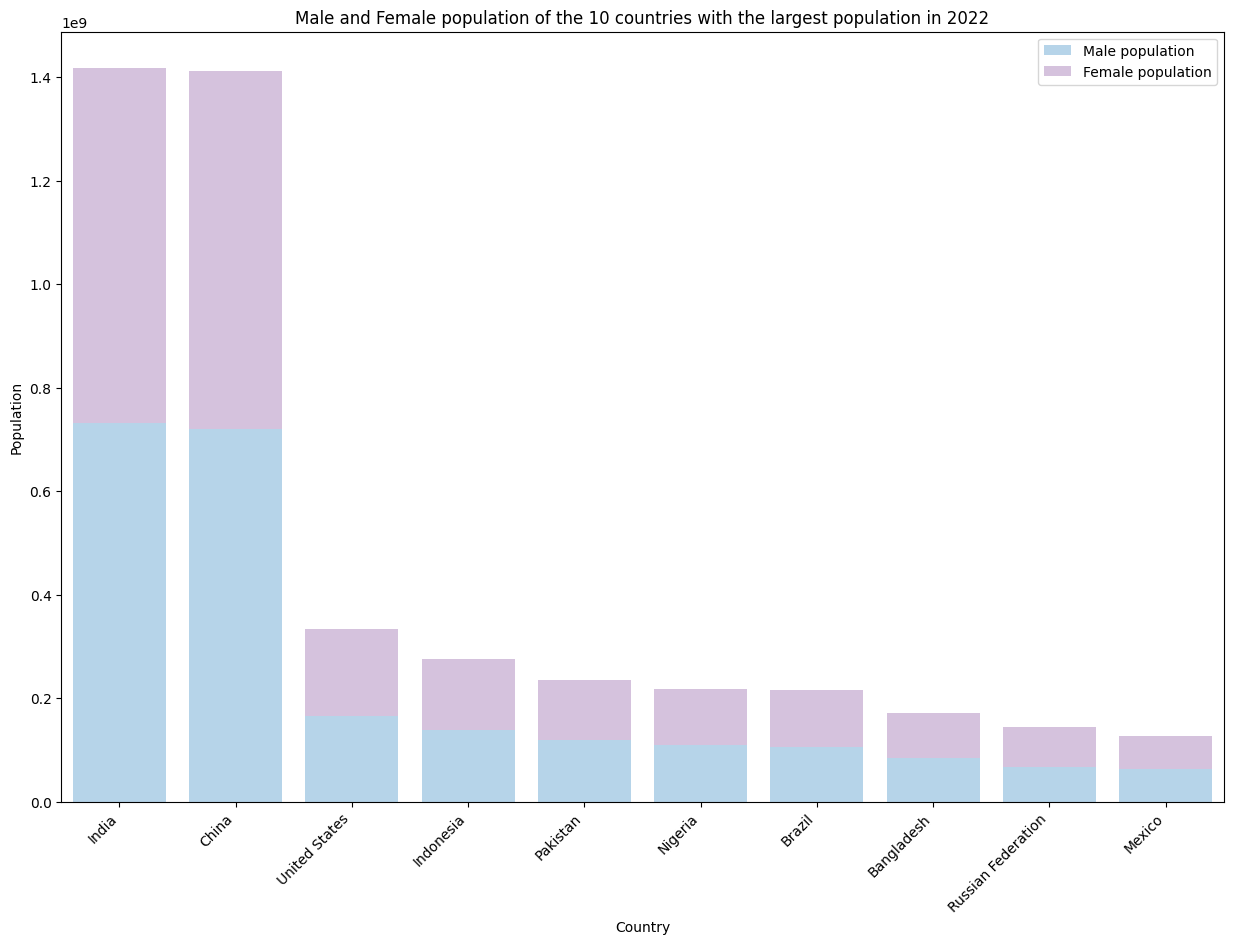

In [29]:
#Bar plot of female and male population of 2022
plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2022')
sns.barplot(x='Country Name', y = '2022_male', data = df_total_2022, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2022_female', data = df_total_2022, bottom = df_total_2022['2022_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


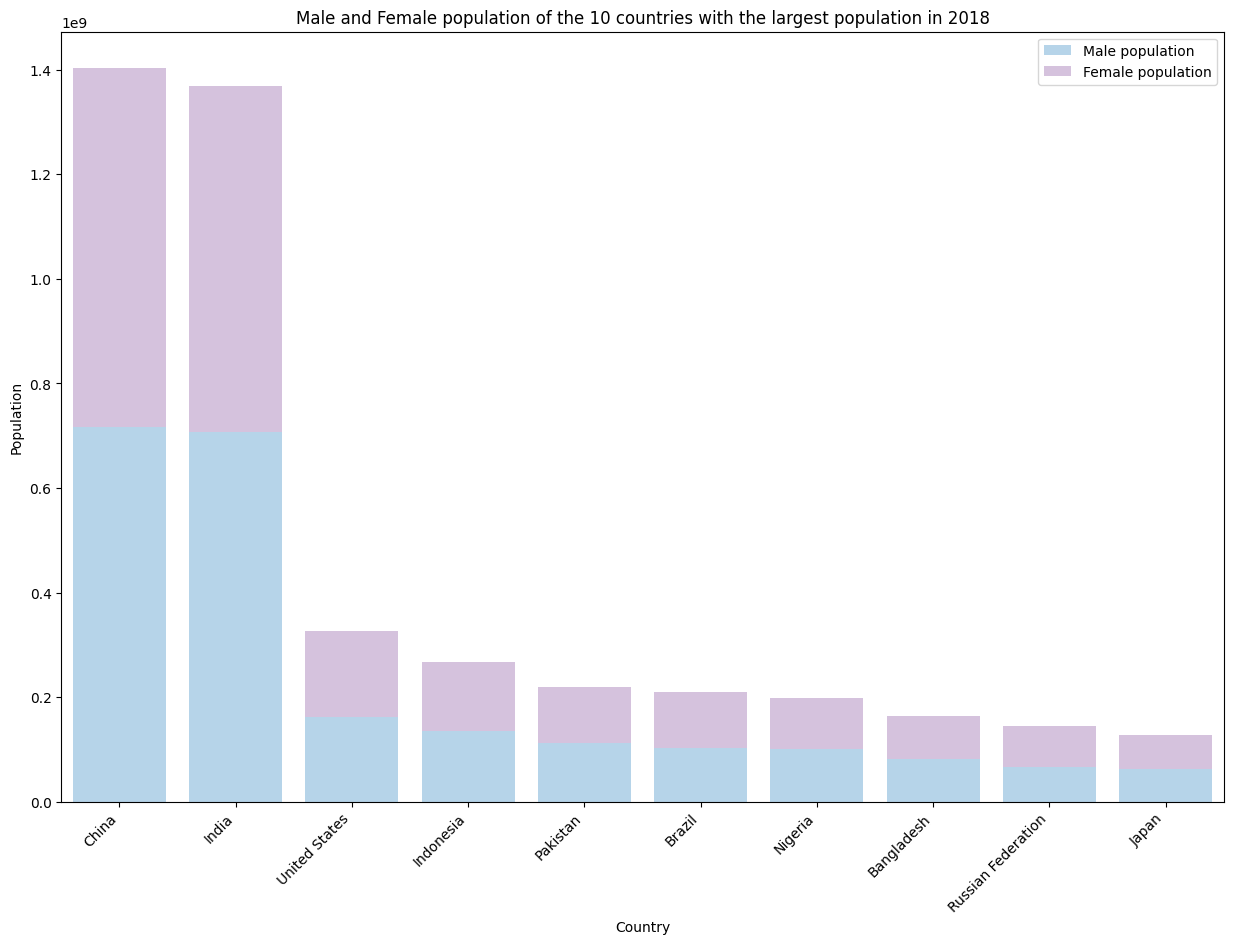

In [30]:
#Bar plot of female and male population of 2018
df_total_2018= combined_df.sort_values(by = 'Total Population 2018', ascending= False)
df_total_2018 = df_total_2018.head(10)
df_total_2018

plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2018')
sns.barplot(x='Country Name', y = '2018_male', data = df_total_2018, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2018_female', data = df_total_2018, bottom = df_total_2018['2018_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

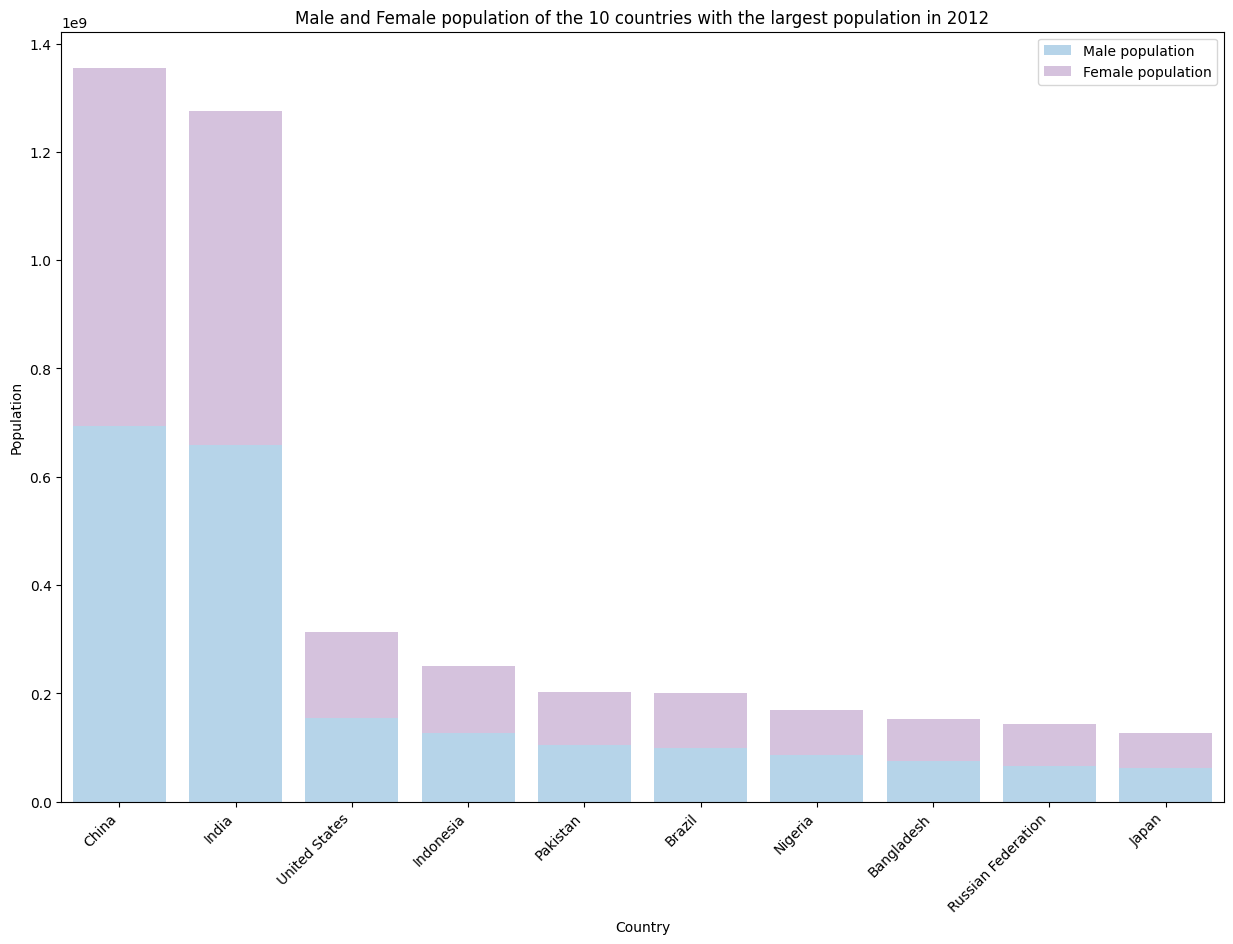

In [31]:
#Bar plot of female and male population of 2012
df_total_2012= combined_df.sort_values(by = 'Total Population 2012', ascending= False)
df_total_2012 = df_total_2012.head(10)
df_total_2012

plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2012')
sns.barplot(x='Country Name', y = '2012_male', data = df_total_2012, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2012_female', data = df_total_2012, bottom = df_total_2012['2012_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

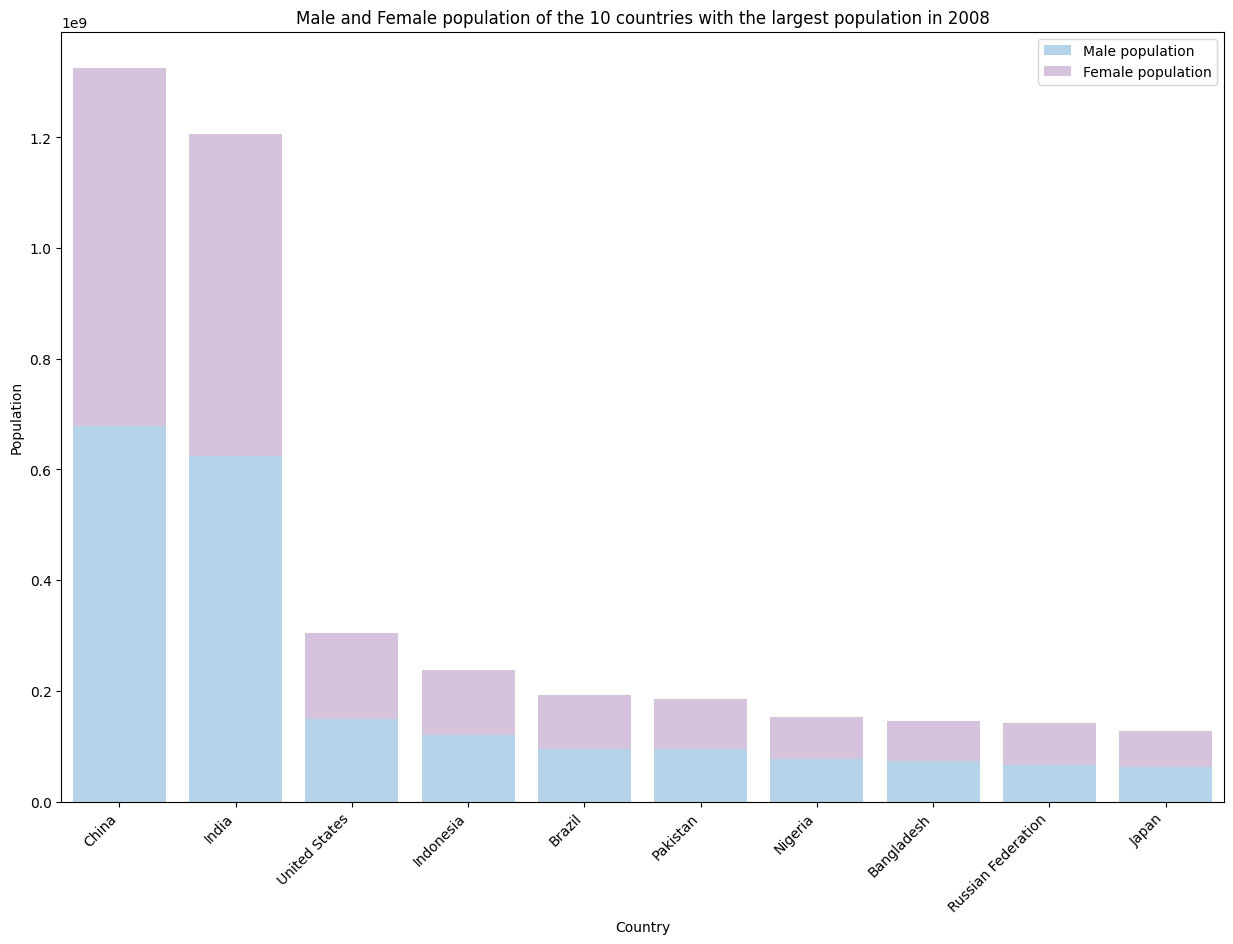

In [32]:
#Bar plot of female and male population of 2008
df_total_2008= combined_df.sort_values(by = 'Total Population 2008', ascending= False)
df_total_2008 = df_total_2008.head(10)
df_total_2008

plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2008')
sns.barplot(x='Country Name', y = '2008_male', data = df_total_2008, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2008_female', data = df_total_2008, bottom = df_total_2008['2008_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

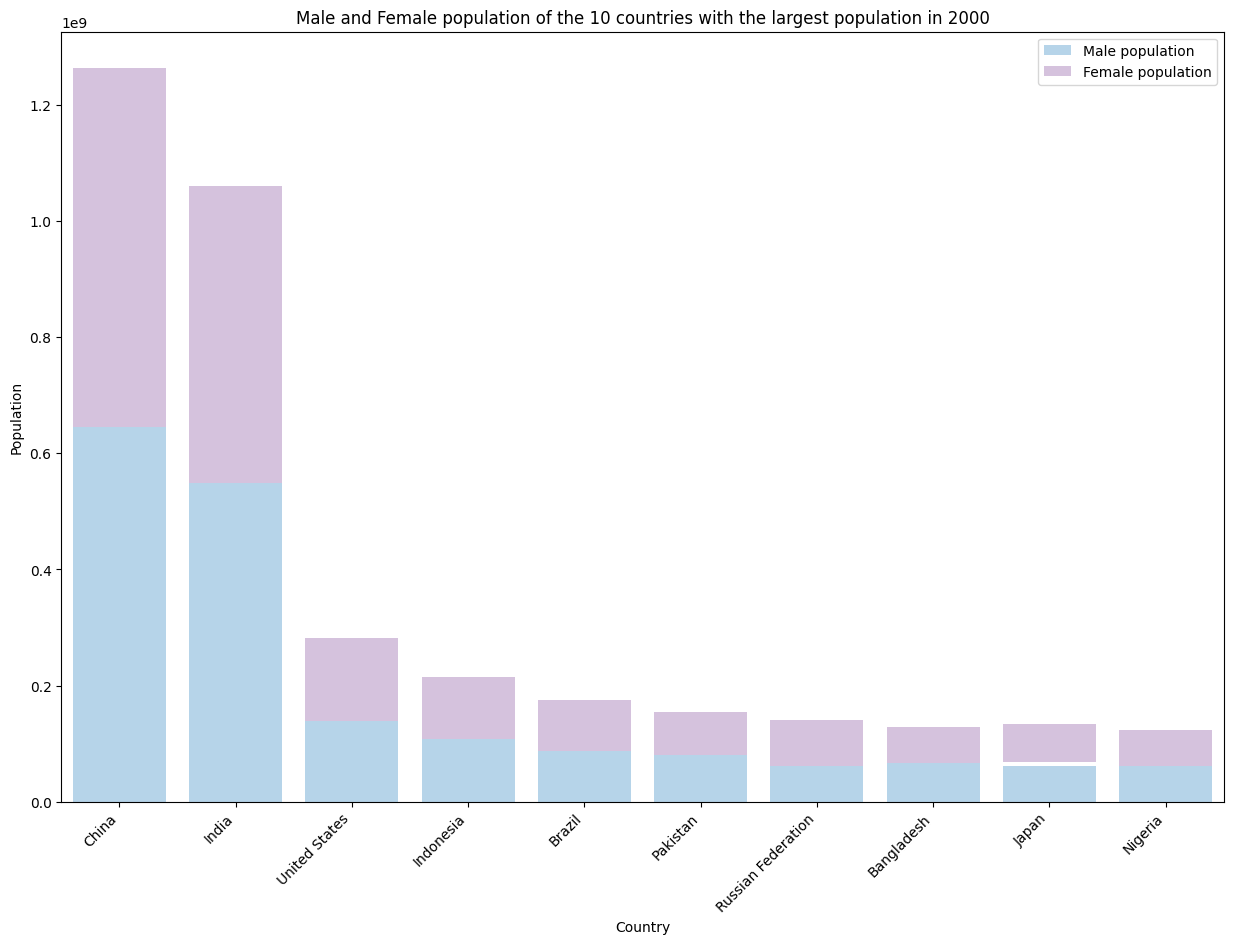

In [33]:
#Bar plot of female and male population of 2000
df_total_2000= combined_df.sort_values(by = 'Total Population 2000', ascending= False)
df_total_2000 = df_total_2000.head(10)
df_total_2000

plt.figure(figsize = (15, 10))

plt.title('Male and Female population of the 10 countries with the largest population in 2000')
sns.barplot(x='Country Name', y = '2000_male', data = df_total_2000, color = '#AED6F1', label = 'Male population')
sns.barplot(x='Country Name', y = '2000_female', data = df_total_2000, bottom = df_total_2008['2000_male'], label = 'Female population', color = '#D7BDE2')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation = 45, ha = 'right')
plt.show()